<a href="https://colab.research.google.com/github/tataphani/b_pt/blob/master/SAS_R_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
! pip install saspy
! pip install pyreadstat

In [139]:
! which java

/usr/bin/java


In [140]:
##First Import saspy using this then Enter the IOM user which is You can use either this user ID or your email address 
## (nkvsas4@gmail.com  Sas_R_Python_3),
## along with your SAS Profile password, to sign in to SAS OnDemand for Academics:
## https://welcome.oda.sas.com and user Login and then password is 
import saspy
sas = saspy.SASsession(iomhost=['odaws01-usw2.oda.sas.com', 'odaws02-usw2.oda.sas.com',
 'odaws03-usw2.oda.sas.com', 'odaws04-usw2.oda.sas.com'],
 java='/usr/bin/java', iomport=8591)

Using SAS Config named: default
Please enter the IOM user id: nkvsas4@gmail.com
Please enter the password for IOM user : ··········
SAS Connection established. Subprocess id is 4797



>##### Python Packages used pandas(open source BSD-licensed library providing,easy to use data structures and data analysis tools for Python programming ) 
Similarly Packages like saspy for sas Interface and matplotlib.pyplot for graphs 

In [141]:
import saspy
import pandas as pd 
pd.set_option('display.max_columns' , None)

import pyreadstat
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [142]:
saspy.__version__

'4.2.0'

In [143]:
#sas1 = saspy.SASsession()

In [144]:
## Mounting data from Google drive

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"
!ls "/content/drive/My Drive/datasets"
!ls "/content/drive/My Drive/datasets/adsl.xpt"
!ls "/content/drive/My Drive/datasets/ts.xpt"
!ls "/content/drive/My Drive/datasets/adae.xpt"
!ls "/content/drive/My Drive/datasets/adsl.sas7bdat"
!ls"/content/drive/My Drive/datasets/ADaM_spec.xlsx"

'Colab Notebooks'		   'Feb R-Ladies Seattle Q&A.gdoc'
 Computer_desktop.zip		   'Getting started.pdf'
 DataManipulationinR_beigners.pdf  'Help Center.gsite'
 datasets			    my_documents_zip.rar
adae.xpt	new_head_ts_xpt_long.xpt  ts.xpt
ADaM_spec.xlsx	new_head_ts_xpt.xpt	  ts_xpt_r.xpt
adsl.sas7bdat	remain			  ts_xpt_using_py_short.xpt
adsl.xpt	SDTM_spec.xlsx		  ts_xpt_write_py_long.xpt
dm.xpt		ts_sasdt.sas7bdat	  ts_xpt_write_py.xpt
'/content/drive/My Drive/datasets/adsl.xpt'
'/content/drive/My Drive/datasets/ts.xpt'
'/content/drive/My Drive/datasets/adae.xpt'
'/content/drive/My Drive/datasets/adsl.sas7bdat'
/bin/bash: ls/content/drive/My Drive/datasets/ADaM_spec.xlsx: No such file or directory


Way to load R into ipython

In [146]:
## reading the .xpt files using the R language
# activate R magic
%load_ext rpy2.ipython

##The rpy2.ipython extension is already loaded. To reload it, use:
#%reload_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [147]:
%%R
install.packages("devtools")
install.packages('dplyr')
install.packages('haven')
install.packages('reticulate')
install.packages('admiral') #Clinical datasets#
install.packages("rio")
install.packages("SASxport")

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpfos04J/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpfos04J/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpfos04J/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpfos04J/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpfos04J/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpfos04J/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpfos04J/downloaded_packages’



In [148]:
%%R
library(devtools)
library(dplyr)
library(admiral)
library(rio)
library(reticulate)
library(dplyr)
library(ggplot2)
library(admiral)
library(SASxport)

In [149]:
#devtools::install_github("https://github.com/atorus-research/xportr.git")
#library(xportr) # https://github.com/atorus-research/xportr/blob/master/inst/specs/ADaM_spec.xlsx

In [ ]:
#@title Installing the packages if needed
%%R
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  install.packages("rio")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

In [151]:
# A bit of imports


# Load in the r magic
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><



### -----Lets make a simple SAS dataset------


In [152]:
## First SAS program using sas.submitLST
sas.submitLST('data a ; x = 1 ; run;proc print data = a ; run;' )

Obs,x
1,1


In [153]:
sas.submitLST("data class ; set sashelp.class (obs = 5);  run; proc print data=class; run;", method='listorlog') 
print(sas.lastlog())

Obs,Name,Sex,Age,Height,Weight
1,Alfred,M,14,69.0,112.5
2,Alice,F,13,56.5,84.0
3,Barbara,F,13,65.3,98.0
4,Carol,F,14,62.8,102.5
5,Henry,M,14,63.5,102.5



7                                                          The SAS System                       Thursday, March 24, 2022 03:08:00 AM

34         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
34       ! ods graphics on / outputfmt=png;
35         
36         data class ; set sashelp.class (obs = 5);  run;
36       !                                                 proc print data=class; run;
37         
38         
39         ods html5 (id=saspy_internal) close;ods listing;
40         

8                                                          The SAS System                       Thursday, March 24, 2022 03:08:00 AM

41         


##### To see how a SASDATA object to see PYTHON convention 
#####'?' in front of the funtion and see the DOCSTRING

In [154]:
?sas.sasdata

##### To see the source code PYTHON convention '??' in front of the funtion   

In [155]:
??sas.sasdata

In [156]:
?sas.submitLST("data class ; set sashelp.class (obs = 5);  run; proc print data=class; run;", method='listorlog') 




---


#####Reading the external data using Python and input dataset for SASsession to use

---



In [157]:
#import pandas as pd
ad_sl = pd.read_csv("https://raw.githubusercontent.com/sas2r/clinical_fd/master/data-raw/inst/extdata/adsl.csv")
#ad_sl.head(ad_sl)
sasdf = sas.df2sd(ad_sl , 'sasdf')

##### Print first five observations of the SAS dataset

In [158]:
sas.submitLST('proc print data = work.sasdf (obs = 10 keep = usubjid trt01p age );where age > 40 ; run;', method='listorlog') 

Obs,usubjid,trt01p,age
1,01-701-1015,Placebo,63
2,01-701-1023,Placebo,64
3,01-701-1028,Xanomeline High Dose,71
4,01-701-1033,Xanomeline Low Dose,74
5,01-701-1034,Xanomeline High Dose,77
6,01-701-1047,Placebo,85
7,01-701-1097,Xanomeline Low Dose,68
8,01-701-1111,Xanomeline Low Dose,81
9,01-701-1115,Xanomeline Low Dose,84
10,01-701-1118,Placebo,52


##### Print first five or last observations of the SAS dataset

In [159]:
age_40_above = sas.sasdata2dataframe ( 
    table = 'sasdf' ,
    libref= 'work' , 
    dsopts = { 
        'where' : ' age > 40 ' , 
        'obs'   :  10, 
        'keep'   : ['usubjid' , 'trt01pn', 'age']
    },
)
print(type (age_40_above))
print()
print(age_40_above.head ())

print(age_40_above.tail ())

<class 'pandas.core.frame.DataFrame'>

       usubjid  trt01pn   age
0  01-701-1015      0.0  63.0
1  01-701-1023      0.0  64.0
2  01-701-1028     81.0  71.0
3  01-701-1033     54.0  74.0
4  01-701-1034     81.0  77.0
       usubjid  trt01pn   age
5  01-701-1047      0.0  85.0
6  01-701-1097     54.0  68.0
7  01-701-1111     54.0  81.0
8  01-701-1115     54.0  84.0
9  01-701-1118      0.0  52.0


##### Create a simple statistics of age by treatment arm using SAS-listorlog- this is the default as of V3.6.5. returns the LST,unless it's empty, then it returns the LOG instead 

In [160]:
sas.submitLST('proc means data = work.sasdf ; class trt01p ; Var age ;  run;', method='listorlog') 

In [161]:
# Create a simple statistics of age by treatment arm using Python
result = ad_sl.groupby('trt01p').agg({'age':[ 'count', 'mean','std', 'min','median', 'max' ]})
print(result)

                       age                                    
                     count       mean       std min median max
trt01p                                                        
Placebo                 86  75.209302  8.590167  52   76.0  89
Xanomeline High Dose    84  74.380952  7.886094  56   76.0  88
Xanomeline Low Dose     84  75.666667  8.286051  51   77.5  88


>#### Getting the contents of the dataset see *sas.sasdata* creates a SASdata object 

In [162]:
age_40_above = sas.sasdata ( 
    table = 'sasdf' ,
    libref= 'work' , 
    dsopts = { 
        'where' : ' age > 40 ' , 
        'obs'   :  10, 
        'keep'   : ['usubjid' , 'trt01pn', 'age']
    },
)
print(type(age_40_above))
print ()
age_40_above.columnInfo()
print ()
age_40_above.describe()


<class 'saspy.sasdata.SASdata'>




,Variable,N,NMiss,Median,Mean,StdDev,Min,P25,P50,P75,Max
0,trt01pn,10.0,0.0,54.0,37.8,34.152599,0.0,0.0,54.0,54.0,81.0
1,age,10.0,0.0,72.5,71.9,10.461039,52.0,64.0,72.5,81.0,85.0


>### Display Generated SAS Code

In [163]:
sas.teach_me_SAS (True)
age_40_above.describe()
sas.teach_me_SAS (False)

proc means data=work.'sasdf'n (where=( age > 40 ) obs=10 keep=usubjid trt01pn age ) stackodsoutput n nmiss median mean std min p25 p50 p75 max;run;


age_40_above.describe() actually generates this SAS code

proc means data=work.'sasdf'n (where=( age > 40 ) 
obs=10 keep=usubjid trt01pn age ) 
stackodsoutput n nmiss median mean std min p25 p50 p75 max;
run;


##### Reading the external data using **R rio package** 

In [164]:
%%R
library(dplyr)
library(rio)
adsl_r <- rio::import ("https://raw.githubusercontent.com/sas2r/clinical_fd/master/data-raw/inst/extdata/adsl.csv") 


##### Create a simple statistics of age by treatment arm using dPLYR

In [165]:
# R way of creating the Basic statistics
%%R
summ_adsl_r  <- adsl_r %>%
                group_by(trt01p) %>%
                summarise (ave_age = mean(age , na.rm = TRUE),
                           med_age = median (age , na.rm = TRUE),
                           min_age = min(age , na.rm = TRUE),
                           max_age = max(age , na.rm = TRUE)
                            )
summ_adsl_r   

# A tibble: 3 × 5
  trt01p               ave_age med_age min_age max_age
  <chr>                  <dbl>   <dbl>   <int>   <int>
1 Placebo                 75.2    76        52      89
2 Xanomeline High Dose    74.4    76        56      88
3 Xanomeline Low Dose     75.7    77.5      51      88


##### Admiral package is an ADaM in R Asset Library, It has couple of ADS based datasets that can used just by calling admiral:: 

In [166]:
%%R
#VISIT1DT  IS NOT AVAILABLE IN ADMIRAL DATASET
names(admiral::adsl)
adsl_r <- admiral::adsl  %>% 
          select(USUBJID,AGE,DTHFL,TRT01P,TRTSDTM , SAFFL) 
head(adsl_r)

# A tibble: 6 × 6
  USUBJID       AGE DTHFL TRT01P TRTSDTM             SAFFL
  <chr>       <dbl> <chr> <chr>  <dttm>              <chr>
1 01-701-1015    63 <NA>  Pbo    2014-01-02 00:00:00 Y    
2 01-701-1023    64 <NA>  Pbo    2012-08-05 00:00:00 Y    
3 01-701-1028    71 <NA>  Xan_Hi 2013-07-19 00:00:00 Y    
4 01-701-1033    74 <NA>  Xan_Lo 2014-03-18 00:00:00 Y    
5 01-701-1034    77 <NA>  Xan_Hi 2014-07-01 00:00:00 Y    
6 01-701-1047    85 <NA>  Pbo    2013-02-12 00:00:00 Y    


>####### Read SAS .xpt files using SAS Proc Copy This does not work as it is creating sasdataset outside SAS Envirnoment. Work in progress for this chunck

In [167]:
sas.submitLST("Libname xptfile xport '/content/drive/My Drive/datasets/adsl.xpt' ;"
              "proc copy inlib = xptfile outlib = work ;  run;"
              ,
              method='listorlog') 

>>###### Read SAS .xpt files using python

In [168]:
#import  pandas as pd
read_adsl_xpt_using_py = pd.read_sas('/content/drive/My Drive/datasets/adsl.xpt')
read_adsl_xpt_using_py.head()

# Summary statistics of all the columns using describe 
#read_adsl_xpt_using_py.describe(include = ['float' , 'category'])  # Will give general statistics of the var


,STUDYID,USUBJID,SUBJID,SITEID,SITEGR1,ARM,TRT01P,TRT01PN,TRT01A,TRT01AN,TRTSDT,TRTEDT,TRTDUR,AVGDD,CUMDOSE,AGE,AGEGR1,AGEGR1N,AGEU,RACE,RACEN,SEX,ETHNIC,SAFFL,ITTFL,EFFFL,COMP8FL,COMP16FL,COMP24FL,DISCONFL,DSRAEFL,DTHFL,BMIBL,BMIBLGR1,HEIGHTBL,WEIGHTBL,EDUCLVL,DISONSDT,DURDIS,DURDSGR1,VISIT1DT,RFSTDTC,RFENDTC,VISNUMEN,RFENDT,DCDECOD,DCREASCD,MMSETOT
0,b'CDISCPILOT01',b'01-701-1015',b'1015',b'701',b'701',b'Placebo',b'Placebo',5.397605e-79,b'Placebo',5.397605e-79,19725.0,19906.0,182.0,5.397605e-79,5.397605e-79,63.0,b'<65',1.0,b'YEARS',b'WHITE',1.0,b'F',b'HISPANIC OR LATINO',b'Y',b'Y',b'Y',b'Y',b'Y',b'Y',b'',b'',b'',25.1,b'25-<30',147.3,54.4,16.0,18382.0,43.9,b'>=12',19718.0,b'2014-01-02',b'2014-07-02',12.0,19906.0,b'COMPLETED',b'Completed',23.0
1,b'CDISCPILOT01',b'01-701-1023',b'1023',b'701',b'701',b'Placebo',b'Placebo',5.397605e-79,b'Placebo',5.397605e-79,19210.0,19237.0,28.0,5.397605e-79,5.397605e-79,64.0,b'<65',1.0,b'YEARS',b'WHITE',1.0,b'M',b'HISPANIC OR LATINO',b'Y',b'Y',b'Y',b'N',b'N',b'N',b'Y',b'Y',b'',30.4,b'>=30',162.6,80.3,14.0,16871.0,76.4,b'>=12',19196.0,b'2012-08-05',b'2012-09-02',5.0,19238.0,b'ADVERSE EVENT',b'Adverse Event',23.0
2,b'CDISCPILOT01',b'01-701-1028',b'1028',b'701',b'701',b'Xanomeline High Dose',b'Xanomeline High Dose',8.100000e+01,b'Xanomeline High Dose',8.100000e+01,19558.0,19737.0,180.0,7.770000e+01,1.398600e+04,71.0,b'65-80',2.0,b'YEARS',b'WHITE',1.0,b'M',b'NOT HISPANIC OR LATINO',b'Y',b'Y',b'Y',b'Y',b'Y',b'Y',b'',b'',b'',31.4,b'>=30',177.8,99.3,16.0,18247.0,42.8,b'>=12',19550.0,b'2013-07-19',b'2014-01-14',12.0,19737.0,b'COMPLETED',b'Completed',23.0
3,b'CDISCPILOT01',b'01-701-1033',b'1033',b'701',b'701',b'Xanomeline Low Dose',b'Xanomeline Low Dose',5.400000e+01,b'Xanomeline Low Dose',5.400000e+01,19800.0,19813.0,14.0,5.400000e+01,7.560000e+02,74.0,b'65-80',2.0,b'YEARS',b'WHITE',1.0,b'M',b'NOT HISPANIC OR LATINO',b'Y',b'Y',b'Y',b'N',b'N',b'N',b'Y',b'',b'',28.8,b'25-<30',175.3,88.5,12.0,18111.0,55.3,b'>=12',19792.0,b'2014-03-18',b'2014-04-14',5.0,19827.0,b'STUDY TERMINATED BY SPONSOR',b'Sponsor Decision',23.0
4,b'CDISCPILOT01',b'01-701-1034',b'1034',b'701',b'701',b'Xanomeline High Dose',b'Xanomeline High Dose',8.100000e+01,b'Xanomeline High Dose',8.100000e+01,19905.0,20087.0,183.0,7.690000e+01,1.406700e+04,77.0,b'65-80',2.0,b'YEARS',b'WHITE',1.0,b'F',b'NOT HISPANIC OR LATINO',b'Y',b'Y',b'Y',b'Y',b'Y',b'Y',b'',b'',b'',26.1,b'25-<30',154.9,62.6,9.0,18899.0,32.9,b'>=12',19898.0,b'2014-07-01',b'2014-12-30',12.0,20087.0,b'COMPLETED',b'Completed',21.0


>>##### Read SAS .xpt files using R 
(RIO package is new universal data reader package) 

In [169]:
%%R
adsl_xpt_r <- rio::import("/content/drive/My Drive/datasets/adsl.xpt")
head(tibble(adsl_xpt_r))

# A tibble: 6 × 48
  STUDYID      USUBJID SUBJID SITEID SITEGR1 ARM   TRT01P TRT01PN TRT01A TRT01AN
  <chr>        <chr>   <chr>  <chr>  <chr>   <chr> <chr>    <dbl> <chr>    <dbl>
1 CDISCPILOT01 01-701… 1015   701    701     Plac… Place…       0 Place…       0
2 CDISCPILOT01 01-701… 1023   701    701     Plac… Place…       0 Place…       0
3 CDISCPILOT01 01-701… 1028   701    701     Xano… Xanom…      81 Xanom…      81
4 CDISCPILOT01 01-701… 1033   701    701     Xano… Xanom…      54 Xanom…      54
5 CDISCPILOT01 01-701… 1034   701    701     Xano… Xanom…      81 Xanom…      81
6 CDISCPILOT01 01-701… 1047   701    701     Plac… Place…       0 Place…       0
# … with 38 more variables: TRTSDT <date>, TRTEDT <date>, TRTDUR <dbl>,
#   AVGDD <dbl>, CUMDOSE <dbl>, AGE <dbl>, AGEGR1 <chr>, AGEGR1N <dbl>,
#   AGEU <chr>, RACE <chr>, RACEN <dbl>, SEX <chr>, ETHNIC <chr>, SAFFL <chr>,
#   ITTFL <chr>, EFFFL <chr>, COMP8FL <chr>, COMP16FL <chr>, COMP24FL <chr>,
#   DISCONFL <chr>, DSRAEFL <chr>

>###### Way to read SAS dataset into R

In [170]:
%%R
adsl_atorus <- haven::read_sas("/content/drive/My Drive/datasets/adsl.sas7bdat")
head(adsl_atorus)

# A tibble: 6 × 23
  STUDYID   SITEID USUBJID SUBJID COUNTRY ACOUNTRY   AGE AGEU  SEX   RACE  RACEN
  <chr>      <dbl> <chr>    <dbl> <chr>   <chr>    <dbl> <chr> <chr> <chr> <dbl>
1 mid987650 214356 987650…      1 USA     UNITED …    35 YEARS M     ASIAN     2
2 mid987650 214356 987650…      2 USA     UNITED …    62 YEARS M     WHITE     1
3 mid987650 214356 987650…      3 USA     UNITED …    27 YEARS F     ASIAN     2
4 mid987650 214356 987650…      4 USA     UNITED …    42 YEARS M     ASIAN     2
5 mid987650 214356 987650…      5 USA     UNITED …    59 YEARS F     WHITE     1
6 mid987650 214356 987650…      6 USA     UNITED …    28 YEARS M     WHITE     1
# … with 12 more variables: WEIGHTBL <dbl>, TRT01A <chr>, TRT01AN <dbl>,
#   SAFFL <chr>, SCRDT <date>, RANDDT <date>, TRTSDT <date>, TRTSTM <time>,
#   TRTEDT <date>, TRTETM <time>, BRTHDT <date>, BRTHDTC <dbl>


### You can read .Xlsx file 

var_spec <- readxl::read_xlsx("/content/drive/My Drive/datasets/ADaM_spec.xlsx", sheet = "Variables") %>%
  dplyr::rename(type = "Data Type") %>%
  rlang::set_names(tolower)

  data_spec <- readxl::read_xlsx("/content/drive/My Drive/datasets/ADaM_spec.xlsx", sheet = "Datasets") %>%
  rlang::set_names(tolower) %>%
  dplyr::rename(label = "description")


>###### Creating R data frame 

In [171]:
%%R
ts_xpt_r <- rio::import("/content/drive/My Drive/datasets/ts.xpt")
head_ts_xpt <- head(ts_xpt_r)

>##### Way to see how a data frame created dput

In [172]:
%%R
#dput(ts_xpt_r )
#dput(head_ts_xpt ,control = c('keepNA' , 'keepInteger' , 'niceNames' , 'showAttributes'))
## Way to Drop a variable
new_head_ts_xpt <- head_ts_xpt %>%
                   select(-STUDYID ) %>%
                   mutate(LONG_DOM_AIN_NAME = DOMAIN) %>%
                   relocate(LONG_DOM_AIN_NAME ,.before = DOMAIN)

new_head_ts_xpt                   

  LONG_DOM_AIN_NAME DOMAIN TSSEQ TSPARMCD                          TSPARM
1                TS     TS     1    ADDON Added on to Existing Treatments
2                TS     TS     1   AGEMAX Planned Maximum Age of Subjects
3                TS     TS     1   AGEMIN Planned Minimum Age of Subjects
4                TS     TS     1  AGESPAN                       Age Group
5                TS     TS     2  AGESPAN                       Age Group
6                TS     TS     1   TBLIND           Trial Blinding Schema
           TSVAL
1              Y
2     No maximum
3       50 years
4  ADULT (18-65)
5 ELDERLY (> 65)
6   DOUBLE BLIND


>##### Write it out a .Xpt file using SASxport, see the new variable NAME_OF_THE_DOMAIN (longer than 8 Char) SASxport default to V5


In [173]:
%%R
write.xport (new_head_ts_xpt , file='/content/drive/MyDrive/datasets/ts_xpt_r.xpt')


#Check if it is written right#
ts_xpt_r <- rio::import("/content/drive/My Drive/datasets/ts_xpt_r.xpt")
ts_xpt_r

  LONG_DOM DOMAIN TSSEQ TSPARMCD                          TSPARM          TSVAL
1       TS     TS     1    ADDON Added on to Existing Treatments              Y
2       TS     TS     1   AGEMAX Planned Maximum Age of Subjects     No maximum
3       TS     TS     1   AGEMIN Planned Minimum Age of Subjects       50 years
4       TS     TS     1  AGESPAN                       Age Group  ADULT (18-65)
5       TS     TS     2  AGESPAN                       Age Group ELDERLY (> 65)
6       TS     TS     1   TBLIND           Trial Blinding Schema   DOUBLE BLIND


>##### Write out to .Xpt file using HAVEN package, see the new variable NAME_OF_THE_DOMAIN (longer than 8 Char) HAVEN package can used to write V8


In [174]:
%%R
tmp <- tempfile (fileext = ".xpt")
new_head_ts_xpt_long <- new_head_ts_xpt
haven::write_xpt (new_head_ts_xpt_long , "/content/drive/My Drive/datasets/new_head_ts_xpt_long.xpt", 
                  version = 8 , 
                  name = NULL  )


In [175]:
%%R
tmp <- tempfile (fileext = ".xpt")
new_head_ts_xpt_long <- new_head_ts_xpt
haven::write_xpt (new_head_ts_xpt_long , tmp, version = 8 , name = NULL  )
haven::read_xpt(tmp)

# A tibble: 6 × 6
  LONG_DOM_AIN_NAME DOMAIN TSSEQ TSPARMCD TSPARM                          TSVAL 
  <chr>             <chr>  <dbl> <chr>    <chr>                           <chr> 
1 TS                TS         1 ADDON    Added on to Existing Treatments Y     
2 TS                TS         1 AGEMAX   Planned Maximum Age of Subjects No ma…
3 TS                TS         1 AGEMIN   Planned Minimum Age of Subjects 50 ye…
4 TS                TS         1 AGESPAN  Age Group                       ADULT…
5 TS                TS         2 AGESPAN  Age Group                       ELDER…
6 TS                TS         1 TBLIND   Trial Blinding Schema           DOUBL…


In [176]:
%%R
ts_xpt_r <- rio::import("/content/drive/My Drive/datasets/new_head_ts_xpt_long.xpt")
ts_xpt_r

  LONG_DOM_AIN_NAME DOMAIN TSSEQ TSPARMCD                          TSPARM
1                TS     TS     1    ADDON Added on to Existing Treatments
2                TS     TS     1   AGEMAX Planned Maximum Age of Subjects
3                TS     TS     1   AGEMIN Planned Minimum Age of Subjects
4                TS     TS     1  AGESPAN                       Age Group
5                TS     TS     2  AGESPAN                       Age Group
6                TS     TS     1   TBLIND           Trial Blinding Schema
           TSVAL
1              Y
2     No maximum
3       50 years
4  ADULT (18-65)
5 ELDERLY (> 65)
6   DOUBLE BLIND


> ###### Writing .XPT file using Pandas write_xport( ) function 

In [177]:
ts_xpt_using_py = pd.read_sas('/content/drive/My Drive/datasets/ts.xpt')
pd_data = pd.DataFrame(ts_xpt_using_py.head())
##Rename the columns
 
#pd_data.assign(LONG_DOM_AIN_NAME = pd_data['DOMAIN'] )
pd_data['LONG_DOM_AIN_NAME'] = pd_data['DOMAIN'] 
print(pd_data )
pd.set_option ("display.max_columns" , None)
pd.set_option ("display.max_rows" , None)

           STUDYID DOMAIN  TSSEQ    TSPARMCD  \
0  b'CDISCPILOT01'  b'TS'    1.0    b'ADDON'   
1  b'CDISCPILOT01'  b'TS'    1.0   b'AGEMAX'   
2  b'CDISCPILOT01'  b'TS'    1.0   b'AGEMIN'   
3  b'CDISCPILOT01'  b'TS'    1.0  b'AGESPAN'   
4  b'CDISCPILOT01'  b'TS'    2.0  b'AGESPAN'   

                               TSPARM              TSVAL LONG_DOM_AIN_NAME  
0  b'Added on to Existing Treatments'               b'Y'             b'TS'  
1  b'Planned Maximum Age of Subjects'      b'No maximum'             b'TS'  
2  b'Planned Minimum Age of Subjects'        b'50 years'             b'TS'  
3                        b'Age Group'   b'ADULT (18-65)'             b'TS'  
4                        b'Age Group'  b'ELDERLY (> 65)'             b'TS'  


In [178]:
### Writing it out as .XPT file 
path = "/content/drive/My Drive/datasets/ts_xpt_write_py_long.xpt" 
pyreadstat.write_xport(pd_data , path)

ts_xpt_using_py_short = ts_xpt_using_py.head()
path = "/content/drive/My Drive/datasets/ts_xpt_using_py_short.xpt" 
pyreadstat.write_xport(ts_xpt_using_py_short , path)


>##### read_sas *.Xpt* generated by *write_xport* as per the SAS user community read_sas is not able to read back dataset created by python using SAS9.4 pandas

In [179]:
#read_ts_xpt_using_py_long = pd.read_sas('/content/drive/My Drive/datasets/ts_xpt_write_py_long.xpt')
#print(read_ts_xpt_using_py_long)


In [180]:
#read_ts_xpt_using_py_short = pd.read_sas('/content/drive/My Drive/datasets/ts_xpt_using_py_short.xpt')
#print(read_ts_xpt_using_py_short)


>##### Creating the Graph 

In [181]:
#import pandas as pd
ad_sl = pd.read_csv("https://raw.githubusercontent.com/sas2r/clinical_fd/master/data-raw/inst/extdata/adsl.csv")
#ad_sl.head(ad_sl)
sasdf = sas.df2sd(ad_sl , 'sasdf')
#ad_sl.info()

SAS Connection terminated. Subprocess id was 2343


In [182]:
age = sas.sasdata ( 
    table = 'sasdf' ,
    libref= 'work' , 
    dsopts = { 
                'keep'   : ['usubjid' , 'trt01pn','trt01p', 'age' , 'sex','race','heightbl']
    },
)

>#### SASpy has easy way of generating Graphs ( by easy Wrappers ) for example 


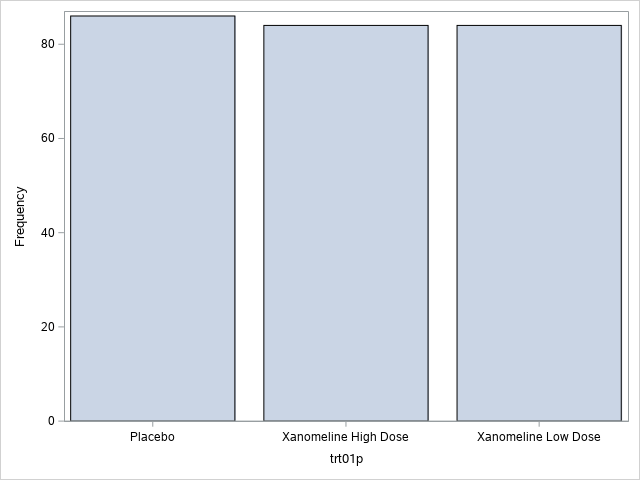

In [183]:
age.bar('trt01p') 

>#### SAS equalvant of age.bar() is 


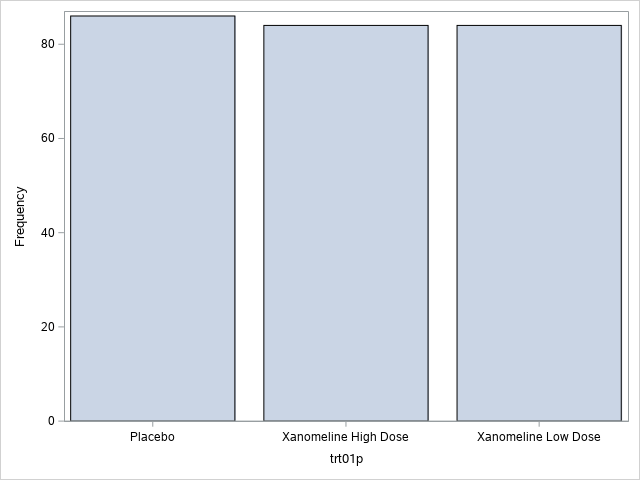

In [184]:
sas.submitLST('proc sgplot data=work.sasdf  (keep=usubjid trt01pn trt01p age sex race heightbl );	vbar trt01p ;run;title;', method='listorlog') 

>#### for cross check SAS equilvant code of age.bar('trt01p') 

In [185]:
sas.teach_me_SAS (True)
age.bar('trt01p')
sas.teach_me_SAS (False)

proc sgplot data=work.'sasdf'n (keep=usubjid trt01pn trt01p age sex race heightbl );
	vbar 'trt01p'n;
run;
title;


>#### Similar Graph using Python matplot library is 

trt01p
Placebo                 86
Xanomeline High Dose    84
Xanomeline Low Dose     84
dtype: int64



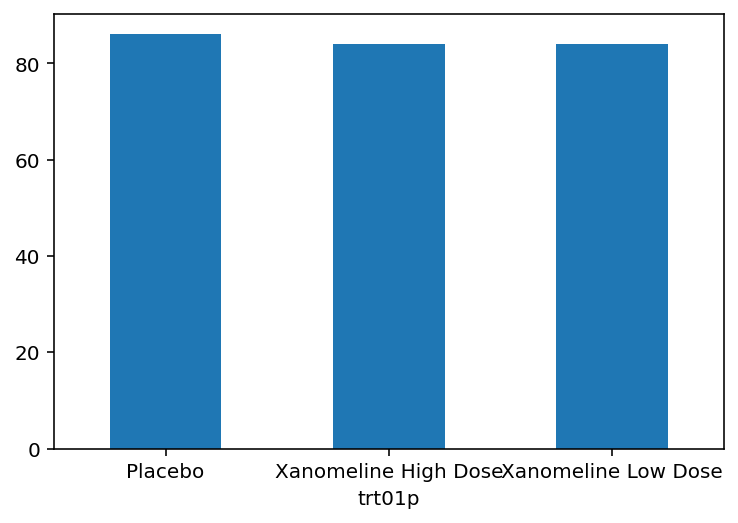

In [186]:
import matplotlib.pyplot as plt
import numpy as np

adsl_summ = ad_sl.groupby('trt01p').size()
adsl_summ
print(adsl_summ)
print()
ax = adsl_summ.plot.bar( x = 'trt01p' , rot = 0  )

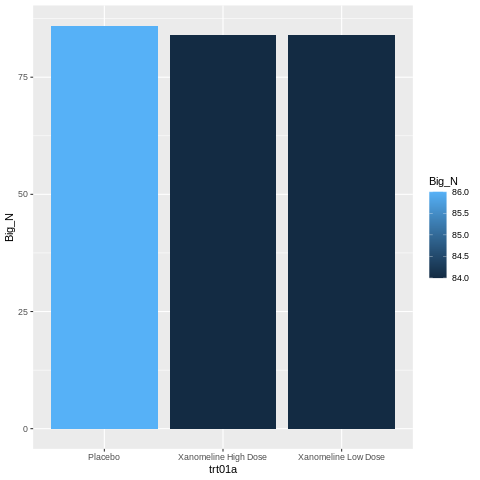

In [187]:
%%R
library(ggplot2)
library(dplyr)
library(rio)

adsl_r <- rio::import ("https://raw.githubusercontent.com/sas2r/clinical_fd/master/data-raw/inst/extdata/adsl.csv") 


summ_adsl_r <- adsl_r %>%  
  group_by(trt01a)  %>% 
  summarise( Big_N =  n( )) 

ggplot(summ_adsl_r, aes(x = trt01a , y = Big_N , fill =  Big_N )) + 
geom_bar( stat = "identity" ) 